In [1]:
import astropy
from astropy.table import Table, vstack
from astropy.io import fits
import dace
np.random.seed(13)

In [2]:
from utils import *

#### stellar sample

These stars are all HARPS GTO targets (as uniformly characterized by Sousa et al. 2008) with measured vsini (as non-uniformly measured and compiled in Glebocki et al. 2006).

In [3]:
t = Table.read('sousa-vsini-xmatch.vot', format='votable')

/Users/mbedell/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


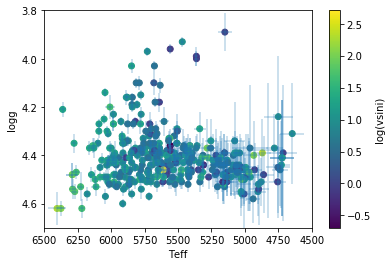

In [4]:
plt.errorbar(t['Teff'], t['logg'], xerr=t['e_Teff'], yerr=t['e_logg'], fmt='none',  alpha=0.3)
plt.scatter(t['Teff'], t['logg'], c=np.log(t['vsini']))
plt.ylim([4.7,3.8])
plt.xlim([6500,4500])
plt.colorbar(label='log(vsini)')
plt.xlabel('Teff')
plt.ylabel('logg');

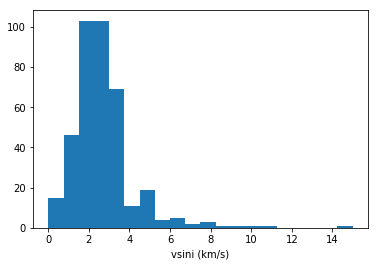

In [5]:
plt.hist(t['vsini'], bins=20)
plt.xlabel('vsini (km/s)');

#### fetch spectra

In [6]:
#stars = np.random.choice(t, 200, replace=False)
stars = t

In [8]:
targets = []
err_rvs = []
for s in stars:
    starname = str(s['Star']).strip("'").strip("b'").replace(" ", "") # SUCH A HACK
    files = download_spectra(starname)
    if files is not None:
        for f in files:
            wave, flux = read_spectrum(f)
            err_rv = calc_rv_err(wave, flux)
            targets.append(s['Star'])
            err_rvs.append(err_rv)

Insufficient data returned for HD142
Insufficient data returned for HD361
Insufficient data returned for HD750
Insufficient data returned for HD870


2020-02-10 16:08:32,486 - INFO - File downloading on location : HD967.tar.gz
2020-02-10 16:08:33,339 - INFO - File downloaded on location : HD967.tar.gz


 Download : 2 MB
Download done


/Users/mbedell/python/thethethe/utils.py:49: RuntimeWarning: divide by zero encountered in true_divide
  err_rv_perpix = err_flux / df_dv
/Users/mbedell/python/thethethe/utils.py:49: RuntimeWarning: invalid value encountered in true_divide
  err_rv_perpix = err_flux / df_dv


Insufficient data returned for HD1237
Insufficient data returned for HD1320
Insufficient data returned for HD1388


2020-02-10 16:08:35,372 - INFO - File downloading on location : HD1461.tar.gz


 Download : 1 MB

2020-02-10 16:08:38,778 - INFO - File downloaded on location : HD1461.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD1581
Insufficient data returned for HD2025
Insufficient data returned for HD2071


2020-02-10 16:08:40,776 - INFO - File downloading on location : HD2638.tar.gz


 Download : 2 MB

2020-02-10 16:08:43,220 - INFO - File downloaded on location : HD2638.tar.gz



Download done
Insufficient data returned for HD3823
Insufficient data returned for HD4208
Insufficient data returned for HD4307


2020-02-10 16:08:45,241 - INFO - File downloading on location : HD4308.tar.gz


 Download : 2 MB

2020-02-10 16:08:50,578 - INFO - File downloaded on location : HD4308.tar.gz



Download done
Insufficient data returned for HD4915
Insufficient data returned for HD6348
Insufficient data returned for HD6673
Insufficient data returned for HD6735
Insufficient data returned for HD7134


2020-02-10 16:08:53,195 - INFO - File downloading on location : HD7449.tar.gz


 Download : 1 MB

2020-02-10 16:08:55,575 - INFO - File downloaded on location : HD7449.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD8326
Insufficient data returned for HD8389A
Insufficient data returned for HD8406
Insufficient data returned for HD8638
Insufficient data returned for HD8828
Insufficient data returned for HD8828
Insufficient data returned for HD8859
Insufficient data returned for HD8912
Insufficient data returned for HD9246
Insufficient data returned for HD9782
Insufficient data returned for HD10002
Insufficient data returned for HD10166


2020-02-10 16:09:00,353 - INFO - File downloading on location : HD10180.tar.gz


 Download : 1 MB

2020-02-10 16:09:03,847 - INFO - File downloaded on location : HD10180.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD10647
Insufficient data returned for HD10700
Insufficient data returned for HD10700
Insufficient data returned for HD11226
Insufficient data returned for HD11505
Insufficient data returned for HD12387
Insufficient data returned for HD13060
Insufficient data returned for HD13724
Insufficient data returned for HD13808
Insufficient data returned for HD14374
Insufficient data returned for HD14680
Insufficient data returned for HD14747
Insufficient data returned for HD15337
Insufficient data returned for HD16141
Insufficient data returned for HD16297
Insufficient data returned for HD16417
Insufficient data returned for HD16714
Insufficient data returned for HD17051
Insufficient data returned for HD17970
Insufficient data returned for HD19034
Insufficient data returned for HD19467
Insufficient data returned for HD19994
Insufficient data returned for HD19994


2020-02-10 16:09:12,745 - INFO - File downloading on location : HD20003.tar.gz


 Download : 1 MB

2020-02-10 16:09:14,827 - INFO - File downloaded on location : HD20003.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD20407
Insufficient data returned for HD20619


2020-02-10 16:09:16,330 - INFO - File downloading on location : HD20781.tar.gz


 Download : 2 MB

2020-02-10 16:09:17,177 - INFO - File downloaded on location : HD20781.tar.gz



Download done


2020-02-10 16:09:18,151 - INFO - File downloading on location : HD20782.tar.gz


 Download : 2 MB

2020-02-10 16:09:19,555 - INFO - File downloaded on location : HD20782.tar.gz



Download done


2020-02-10 16:09:20,639 - INFO - File downloading on location : HD20794.tar.gz


 Download : 2 MB

2020-02-10 16:09:22,937 - INFO - File downloaded on location : HD20794.tar.gz



Download done
Insufficient data returned for HD20807
Insufficient data returned for HD21019
Insufficient data returned for HD21411


2020-02-10 16:09:25,142 - INFO - File downloading on location : HD21693.tar.gz
2020-02-10 16:09:26,069 - INFO - File downloaded on location : HD21693.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD21938
Insufficient data returned for HD22049
Insufficient data returned for HD22610


2020-02-10 16:09:27,987 - INFO - File downloading on location : HD22879.tar.gz


 Download : 1 MB

2020-02-10 16:09:30,822 - INFO - File downloaded on location : HD22879.tar.gz



Download done
Insufficient data returned for HD23079
Insufficient data returned for HD23249
Insufficient data returned for HD23356
Insufficient data returned for HD23456
Insufficient data returned for HD24892
Insufficient data returned for HD25105
Insufficient data returned for HD25120
Insufficient data returned for HD25565
Insufficient data returned for HD26965A
Insufficient data returned for HD26965A
Insufficient data returned for HD27063
Insufficient data returned for HD28185
Insufficient data returned for HD28471
Insufficient data returned for HD28701
Insufficient data returned for HD28821
Insufficient data returned for HD30278
Insufficient data returned for HD30306


2020-02-10 16:09:38,748 - INFO - File downloading on location : HD31527.tar.gz
2020-02-10 16:09:39,693 - INFO - File downloaded on location : HD31527.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD31822
Insufficient data returned for HD32724
Insufficient data returned for HD33725
Insufficient data returned for HD34449
Insufficient data returned for HD35854
Insufficient data returned for HD36003
Insufficient data returned for HD36108
Insufficient data returned for HD36379
Insufficient data returned for HD37962
Insufficient data returned for HD37986
Insufficient data returned for HD38277
Insufficient data returned for HD38382
Insufficient data returned for HD38858
Insufficient data returned for HD38973
Insufficient data returned for HD39091
Insufficient data returned for HD39194


2020-02-10 16:09:45,813 - INFO - File downloading on location : HD40307.tar.gz


 Download : 2 MB

2020-02-10 16:09:48,419 - INFO - File downloaded on location : HD40307.tar.gz



Download done
Insufficient data returned for HD40397
Insufficient data returned for HD44120
Insufficient data returned for HD44420
Insufficient data returned for HD44447
Insufficient data returned for HD44573
Insufficient data returned for HD44594
Insufficient data returned for HD45184
Insufficient data returned for HD45289


2020-02-10 16:09:51,986 - INFO - File downloading on location : HD45364.tar.gz


 Download : 1 MB

2020-02-10 16:09:54,400 - INFO - File downloaded on location : HD45364.tar.gz


 Download : 2 MB
Download done


2020-02-10 16:09:55,175 - INFO - File downloading on location : HD47186.tar.gz


 Download : 2 MB

2020-02-10 16:09:57,841 - INFO - File downloaded on location : HD47186.tar.gz



Download done
Insufficient data returned for HD48611
Insufficient data returned for HD50590
Insufficient data returned for HD50806


2020-02-10 16:09:59,938 - INFO - File downloading on location : HD51608.tar.gz


 Download : 2 MB

2020-02-10 16:10:02,038 - INFO - File downloaded on location : HD51608.tar.gz



Download done
Insufficient data returned for HD52265
Insufficient data returned for HD55693
Insufficient data returned for HD59468
Insufficient data returned for HD59711A


2020-02-10 16:10:04,267 - INFO - File downloading on location : HD63765.tar.gz


 Download : 2 MB

2020-02-10 16:10:06,642 - INFO - File downloaded on location : HD63765.tar.gz



Download done
Insufficient data returned for HD65216
Insufficient data returned for HD65562
Insufficient data returned for HD65907A
Insufficient data returned for HD66221
Insufficient data returned for HD66428
Insufficient data returned for HD67458
Insufficient data returned for HD68607
Insufficient data returned for HD68978A
Insufficient data returned for HD69655


2020-02-10 16:10:11,199 - INFO - File downloading on location : HD69830.tar.gz
2020-02-10 16:10:12,004 - INFO - File downloaded on location : HD69830.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD70642
Insufficient data returned for HD70889
Insufficient data returned for HD71334
Insufficient data returned for HD71479
Insufficient data returned for HD71835
Insufficient data returned for HD72673
Insufficient data returned for HD72769
Insufficient data returned for HD73121
Insufficient data returned for HD73256
Insufficient data returned for HD73524
Insufficient data returned for HD74014
Insufficient data returned for HD75289
Insufficient data returned for HD76151
Insufficient data returned for HD78429
Insufficient data returned for HD78538
Insufficient data returned for HD78558
Insufficient data returned for HD78612


2020-02-10 16:10:17,776 - INFO - File downloading on location : HD78747.tar.gz
2020-02-10 16:10:18,678 - INFO - File downloaded on location : HD78747.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD80883
Insufficient data returned for HD81639
Insufficient data returned for HD82516
Insufficient data returned for HD82943
Insufficient data returned for HD83529
Insufficient data returned for HD85119


2020-02-10 16:10:21,628 - INFO - File downloading on location : HD85390.tar.gz
2020-02-10 16:10:22,473 - INFO - File downloaded on location : HD85390.tar.gz


 Download : 2 MB
Download done


2020-02-10 16:10:23,406 - INFO - File downloading on location : HD85512.tar.gz
2020-02-10 16:10:24,166 - INFO - File downloaded on location : HD85512.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD86065
Insufficient data returned for HD86140
Insufficient data returned for HD86171
Insufficient data returned for HD88084
Insufficient data returned for HD88218
Insufficient data returned for HD88656
Insufficient data returned for HD88742
Insufficient data returned for HD89454


2020-02-10 16:10:28,099 - INFO - File downloading on location : HD90156.tar.gz


 Download : 1 MB

2020-02-10 16:10:30,660 - INFO - File downloaded on location : HD90156.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD90711
Insufficient data returned for HD90812
Insufficient data returned for HD92719
Insufficient data returned for HD92788
Insufficient data returned for HD93385
Insufficient data returned for HD94151
Insufficient data returned for HD95456
Insufficient data returned for HD95521
Insufficient data returned for HD96423
Insufficient data returned for HD96700
Insufficient data returned for HD97037
Insufficient data returned for HD97343
Insufficient data returned for HD97998
Insufficient data returned for HD98281
Insufficient data returned for HD98356
Insufficient data returned for HD101581


2020-02-10 16:10:37,198 - INFO - File downloading on location : HD102117.tar.gz


 Download : 1 MB

2020-02-10 16:10:39,386 - INFO - File downloaded on location : HD102117.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD102365
Insufficient data returned for HD102365
Insufficient data returned for HD102438
Insufficient data returned for HD104006


2020-02-10 16:10:41,919 - INFO - File downloading on location : HD104067.tar.gz
2020-02-10 16:10:42,835 - INFO - File downloaded on location : HD104067.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD104982
Insufficient data returned for HD105837
Insufficient data returned for HD106116
Insufficient data returned for HD106275
Insufficient data returned for HD108147
Insufficient data returned for HD108309
Insufficient data returned for HD109200
Insufficient data returned for HD109409
Insufficient data returned for HD110619
Insufficient data returned for HD111031
Insufficient data returned for HD111232
Insufficient data returned for HD112540
Insufficient data returned for HD114613
Insufficient data returned for HD114729
Insufficient data returned for HD114747
Insufficient data returned for HD114783
Insufficient data returned for HD114853
Insufficient data returned for HD115585
Insufficient data returned for HD115617
Insufficient data returned for HD115617
Insufficient data returned for HD115674
Insufficient data returned for HD117105
Insufficient data returned for HD117207
Insufficient data returned for HD117618
Insuffici

2020-02-10 16:10:59,124 - INFO - File downloading on location : HD134060.tar.gz
2020-02-10 16:11:00,051 - INFO - File downloaded on location : HD134060.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD134664
Insufficient data returned for HD134985
Insufficient data returned for HD134987


2020-02-10 16:11:01,883 - INFO - File downloading on location : HD136352.tar.gz
2020-02-10 16:11:02,800 - INFO - File downloaded on location : HD136352.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD136713
Insufficient data returned for HD136894
Insufficient data returned for HD136894
Insufficient data returned for HD137303


2020-02-10 16:11:05,077 - INFO - File downloading on location : HD137388.tar.gz


 Download : 2 MB

2020-02-10 16:11:07,575 - INFO - File downloaded on location : HD137388.tar.gz



Download done
Insufficient data returned for HD138549
Insufficient data returned for HD140901
Insufficient data returned for HD140901
Insufficient data returned for HD141937
Insufficient data returned for HD142022A
Insufficient data returned for HD142022A
Insufficient data returned for HD142709
Insufficient data returned for HD143114
Insufficient data returned for HD144585
Insufficient data returned for HD144628
Insufficient data returned for HD145598
Insufficient data returned for HD145666
Insufficient data returned for HD145809
Insufficient data returned for HD146233
Insufficient data returned for HD146233
Insufficient data returned for HD147512
Insufficient data returned for HD147512
Insufficient data returned for HD147513
Insufficient data returned for HD147513
Insufficient data returned for HD150433
Insufficient data returned for HD151504
Insufficient data returned for HD154363
Insufficient data returned for HD154363
Insufficient data returned for HD154363
Insufficient data retur

2020-02-10 16:11:19,401 - INFO - File downloading on location : HD160691.tar.gz


 Download : 1 MB

2020-02-10 16:11:20,324 - INFO - File downloaded on location : HD160691.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD161098
Insufficient data returned for HD162020
Insufficient data returned for HD162236
Insufficient data returned for HD162396


2020-02-10 16:11:22,537 - INFO - File downloading on location : HD166724.tar.gz
2020-02-10 16:11:23,289 - INFO - File downloaded on location : HD166724.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD167359
Insufficient data returned for HD168746
Insufficient data returned for HD168871
Insufficient data returned for HD169830
Insufficient data returned for HD170493
Insufficient data returned for HD171665
Insufficient data returned for HD171990
Insufficient data returned for HD172513
Insufficient data returned for HD174545
Insufficient data returned for HD176157
Insufficient data returned for HD177409
Insufficient data returned for HD177565
Insufficient data returned for HD177758
Insufficient data returned for HD179949
Insufficient data returned for HD180409


2020-02-10 16:11:28,303 - INFO - File downloading on location : HD181433.tar.gz


 Download : 2 MB

2020-02-10 16:11:32,110 - INFO - File downloaded on location : HD181433.tar.gz



Download done
Insufficient data returned for HD183658
Insufficient data returned for HD183870
Insufficient data returned for HD185615
Insufficient data returned for HD188748
Insufficient data returned for HD189567
Insufficient data returned for HD189625
Insufficient data returned for HD190248


2020-02-10 16:11:34,966 - INFO - File downloading on location : HD190647.tar.gz


 Download : 2 MB

2020-02-10 16:11:36,467 - INFO - File downloaded on location : HD190647.tar.gz



Download done
Insufficient data returned for HD190954
Insufficient data returned for HD191847
Insufficient data returned for HD192117


2020-02-10 16:11:38,344 - INFO - File downloading on location : HD192310.tar.gz


 Download : 2 MB

2020-02-10 16:11:41,176 - INFO - File downloaded on location : HD192310.tar.gz



Download done
Insufficient data returned for HD193193
Insufficient data returned for HD195302
Insufficient data returned for HD195564
Insufficient data returned for HD196050
Insufficient data returned for HD196761
Insufficient data returned for HD196800
Insufficient data returned for HD197210
Insufficient data returned for HD197823
Insufficient data returned for HD198075
Insufficient data returned for HD199190


2020-02-10 16:11:45,258 - INFO - File downloading on location : HD199288.tar.gz


 Download : 1 MB

2020-02-10 16:11:46,793 - INFO - File downloaded on location : HD199288.tar.gz



Download done
Insufficient data returned for HD199960
Insufficient data returned for HD200505
Insufficient data returned for HD202605
Insufficient data returned for HD203384
Insufficient data returned for HD203432
Insufficient data returned for HD203850


2020-02-10 16:11:49,610 - INFO - File downloading on location : HD204313.tar.gz


 Download : 1 MB

2020-02-10 16:11:51,788 - INFO - File downloaded on location : HD204313.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD204385
Insufficient data returned for HD205536
Insufficient data returned for HD206163
Insufficient data returned for HD206172
Insufficient data returned for HD207129
Insufficient data returned for HD207583
Insufficient data returned for HD207700
Insufficient data returned for HD207970
Insufficient data returned for HD208272
Insufficient data returned for HD208487
Insufficient data returned for HD208704
Insufficient data returned for HD209100
Insufficient data returned for HD209458
Insufficient data returned for HD209742
Insufficient data returned for HD210277


2020-02-10 16:11:56,951 - INFO - File downloading on location : HD210752.tar.gz
2020-02-10 16:11:58,256 - INFO - File downloaded on location : HD210752.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD210918
Insufficient data returned for HD211415


2020-02-10 16:11:59,829 - INFO - File downloading on location : HD212301.tar.gz
2020-02-10 16:12:00,546 - INFO - File downloaded on location : HD212301.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD212580
Insufficient data returned for HD212708
Insufficient data returned for HD213042
Insufficient data returned for HD213240
Insufficient data returned for HD213240
Insufficient data returned for HD213575
Insufficient data returned for HD213628
Insufficient data returned for HD213941
Insufficient data returned for HD214385
Insufficient data returned for HD214759


2020-02-10 16:12:04,331 - INFO - File downloading on location : HD215152.tar.gz
2020-02-10 16:12:05,082 - INFO - File downloaded on location : HD215152.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD215456
Insufficient data returned for HD216435
Insufficient data returned for HD216770
Insufficient data returned for HD216777
Insufficient data returned for HD218249


2020-02-10 16:12:07,814 - INFO - File downloading on location : HD219077.tar.gz


 Download : 2 MB

2020-02-10 16:12:10,053 - INFO - File downloaded on location : HD219077.tar.gz



Download done
Insufficient data returned for HD219249
Insufficient data returned for HD220256
Insufficient data returned for HD220339
Insufficient data returned for HD220367
Insufficient data returned for HD220507
Insufficient data returned for HD221146


2020-02-10 16:12:12,830 - INFO - File downloading on location : HD221287.tar.gz
2020-02-10 16:12:13,658 - INFO - File downloaded on location : HD221287.tar.gz


 Download : 2 MB
Download done
Insufficient data returned for HD221356
Insufficient data returned for HD221420
Insufficient data returned for HD222237
Insufficient data returned for HD222335
Insufficient data returned for HD222422
Insufficient data returned for HD222582
Insufficient data returned for HD222595
Insufficient data returned for HD222669
Insufficient data returned for HD223121
Insufficient data returned for HD223171
Insufficient data returned for HD223282
Insufficient data returned for HD224393
Insufficient data returned for HD224789


In [17]:
print("{0} stars of {1} found in DACE.".format(int(len(err_rvs)/2), len(stars)))

40 stars of 385 found in DACE.


In [10]:
vmags = []
fehs = []
vsinis = []
for target in targets:
    vmags.append(t[t['Star'] == target]['VMAG'])
    fehs.append(t[t['Star'] == target]['__Fe_H_'])
    vsinis.append(t[t['Star'] == target]['vsini'])   

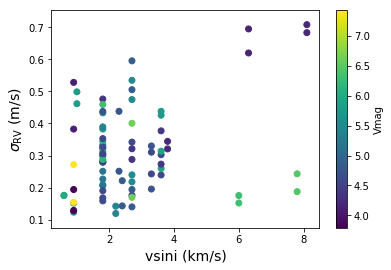

In [12]:
plt.scatter(vsinis, err_rvs, c=vmags)
plt.ylabel(r'$\sigma_{\mathrm{RV}}$ (m/s)', fontsize=14)
plt.xlabel('vsini (km/s)', fontsize=14)
plt.colorbar(label='Vmag');

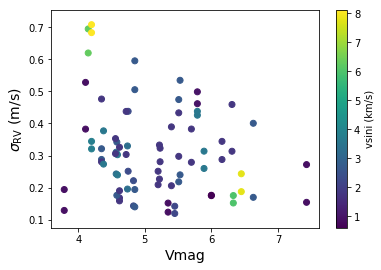

In [13]:
plt.scatter(vmags, err_rvs, c=vsinis)
plt.ylabel(r'$\sigma_{\mathrm{RV}}$ (m/s)', fontsize=14)
plt.xlabel('Vmag', fontsize=14)
plt.colorbar(label='vsini (km/s)');

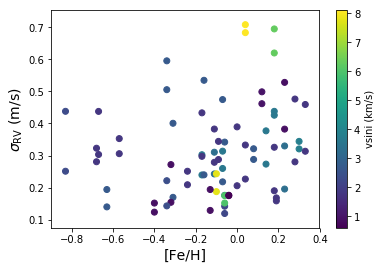

In [18]:
plt.scatter(fehs, err_rvs, c=vsinis)
plt.ylabel(r'$\sigma_{\mathrm{RV}}$ (m/s)', fontsize=14)
plt.xlabel('[Fe/H]', fontsize=14)
plt.colorbar(label='vsini (km/s)');